In [128]:
import os

# Data Manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# hiding Warnings
import warnings
warnings.simplefilter('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [167]:
print(os.getcwd())

C:\Users\ashwi


In [168]:
df=pd.read_csv('Downloads/weather_pred_project/weather_in_australia/weather in australia.csv')

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Performing Descriptive Statistics on Data

In [169]:
df.shape

(145460, 23)

In [170]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [171]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [172]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Step-1:
Be sure you import the variable date with the correct datatype and format when importing data. 

In [174]:
df['Date']=pd.to_datetime(df['Date'])

In [175]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [176]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


### Step-2:
Perform initial data inspection – look at the duplicates, % of missing/irrelevant values in different variables, outliers, and % of records for different categories. Also, check the distribution of different variables.

In [177]:
df.duplicated().sum()

0

In [178]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

#### If Percentage of missing value in the column is greater than 40% then we would not treat missing value in the columns as it would introduce error in the data, we would delete those columns

In [179]:
df.isnull().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

#### Deletion of Un wanted columns

In [180]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [181]:
df.drop(columns=['Evaporation','Sunshine'],axis=1,inplace=True)

In [182]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


### step-3:
Delete those records where the response variable has missing values or any values other than ‘Yes’ or ‘No’. 

In [183]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [184]:
df.shape

(145460, 21)

In [185]:
df.dropna(subset=['RainTomorrow'],inplace=True)

In [186]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [187]:
df.shape

(142193, 21)

### step-4:
Find the missing/irrelevant values across different types of variables. How are you going to treat such data?

In [188]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          679
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [189]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

#### As per the data, if the number of unique variable in the column are less than 20, then we would replace the missimg value with Mode else by Median values 

In [190]:
df['MinTemp'].median()

12.0

In [191]:
df['WindGustDir'].mode()[0]

for col in df.columns :
    
    print('\n\n Columns Missing values:',col,df[col].isnull().sum())
    
    if df[col].isnull().sum() > 0:
        
        print('\n\n Columns in Unique values:',df[col].nunique())
        
        if df[col].nunique() < 20 :
            
            df[col].fillna(df[col].mode()[0],inplace=True)
            
        else :
                
            df[col].fillna(df[col].median(),inplace=True)



 Columns Missing values: Date 0


 Columns Missing values: Location 0


 Columns Missing values: MinTemp 637


 Columns in Unique values: 389


 Columns Missing values: MaxTemp 322


 Columns in Unique values: 505


 Columns Missing values: Rainfall 1406


 Columns in Unique values: 679


 Columns Missing values: WindGustDir 9330


 Columns in Unique values: 16


 Columns Missing values: WindGustSpeed 9270


 Columns in Unique values: 67


 Columns Missing values: WindDir9am 10013


 Columns in Unique values: 16


 Columns Missing values: WindDir3pm 3778


 Columns in Unique values: 16


 Columns Missing values: WindSpeed9am 1348


 Columns in Unique values: 43


 Columns Missing values: WindSpeed3pm 2630


 Columns in Unique values: 44


 Columns Missing values: Humidity9am 1774


 Columns in Unique values: 101


 Columns Missing values: Humidity3pm 3610


 Columns in Unique values: 101


 Columns Missing values: Pressure9am 14014


 Columns in Unique values: 546


 Columns Missing 

In [192]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Step-5:
Determine the high cardinality in a categorical variable. Check whether it is ordinal or nominal, and act accordingly.

In [193]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          679
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [194]:
df.Location.value_counts(normalize=True)*100

Canberra            2.403775
Sydney              2.346810
Perth               2.245540
Darwin              2.244836
Hobart              2.242023
Brisbane            2.223035
Adelaide            2.173103
Bendigo             2.133720
Townsville          2.133016
AliceSprings        2.131610
MountGambier        2.130907
Launceston          2.129500
Ballarat            2.129500
Albany              2.121061
Albury              2.117544
PerthAirport        2.116138
MelbourneAirport    2.116138
Mildura             2.114731
SydneyAirport       2.113325
Nuriootpa           2.111215
Sale                2.109808
Watsonia            2.109105
Tuggeranong         2.108402
Portland            2.106995
Woomera             2.102776
Cairns              2.101369
Cobar               2.101369
Wollongong          2.097853
GoldCoast           2.095743
WaggaWagga          2.092930
Penrith             2.084491
NorfolkIsland       2.084491
SalmonGums          2.078161
Newcastle           2.078161
CoffsHarbour  

In [195]:
df.drop(columns=['Location','WindDir9am','WindDir3pm'],inplace=True)

In [196]:
df.head(2)

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,W,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,7.4,25.1,0.0,WNW,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No


#### Creating Encoding for String columns

In [197]:
final_df=pd.get_dummies(df,columns=['WindGustDir','RainToday','RainTomorrow'],drop_first=True)

In [198]:
final_df.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,RainToday_Yes,RainTomorrow_Yes
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Feature Engineering
Creating Month and Quarter and Week columns from Date columns

In [199]:
final_df['Month']=final_df['Date'].dt.month
final_df['Quarter']=final_df['Date'].dt.quarter
final_df['Week']=final_df['Date'].dt.week
final_df.head(2)

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,RainToday_Yes,RainTomorrow_Yes,Month,Quarter,Week
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,4,49
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12,4,49


In [200]:
final_df.drop(columns=['Date'],axis=1,inplace=True)

### step-6:
Find the outliers and apply an appropriate strategy for the treatment.

In [201]:
final_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'RainToday_Yes', 'RainTomorrow_Yes', 'Month', 'Quarter', 'Week'],
      dtype='object')

In [205]:
numeric_columns=df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

MinTemp


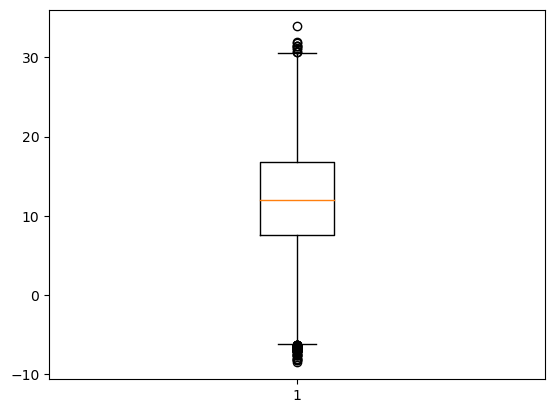

MaxTemp


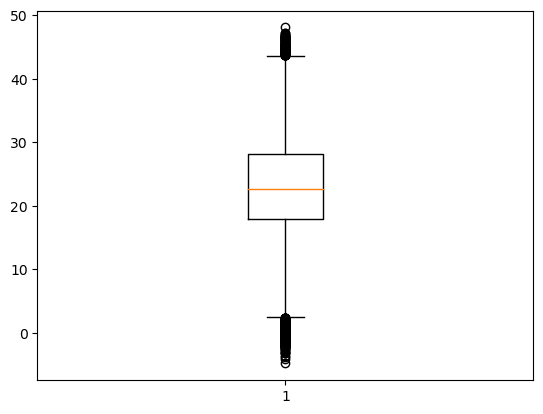

Rainfall


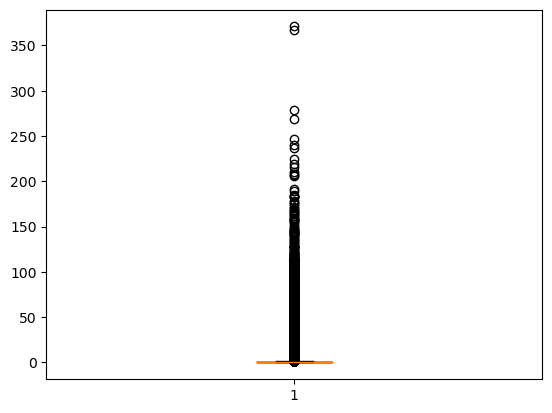

WindGustSpeed


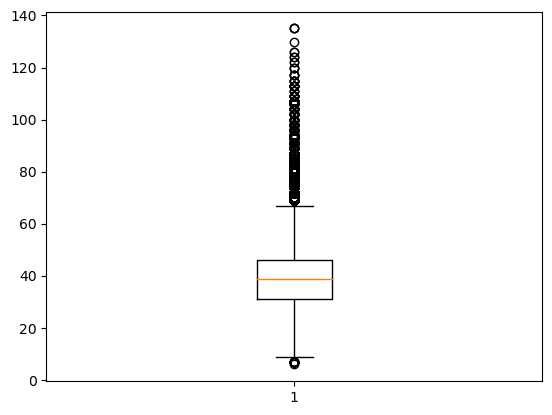

WindSpeed9am


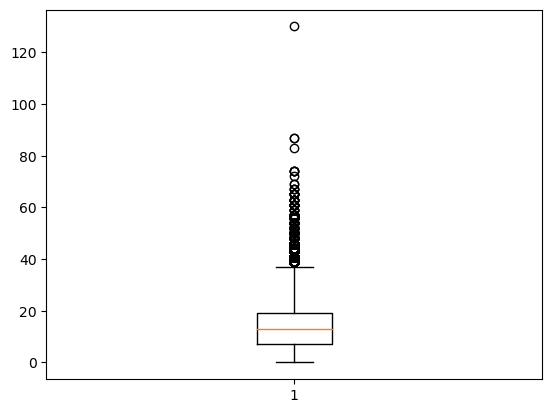

WindSpeed3pm


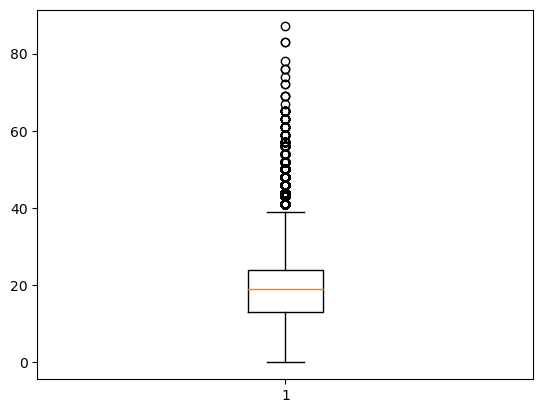

Humidity9am


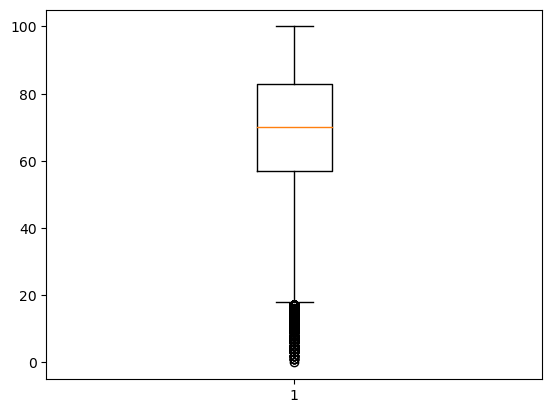

Humidity3pm


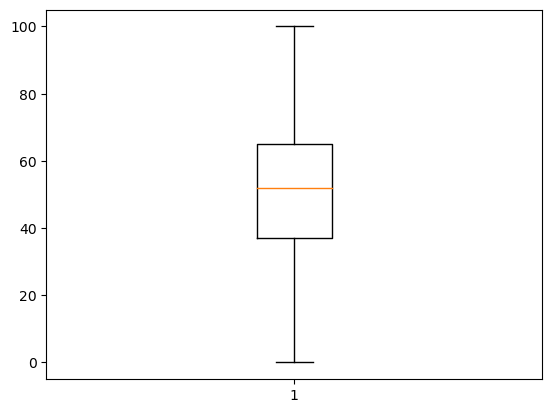

Pressure9am


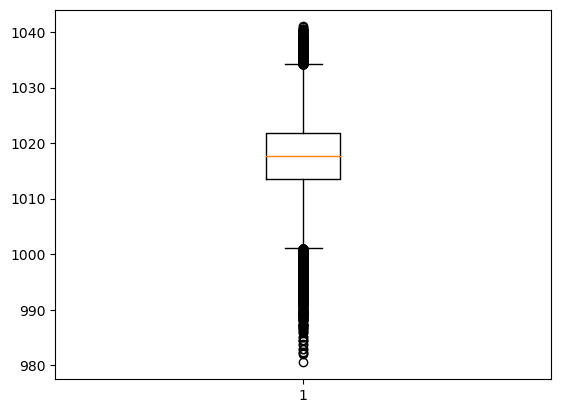

Pressure3pm


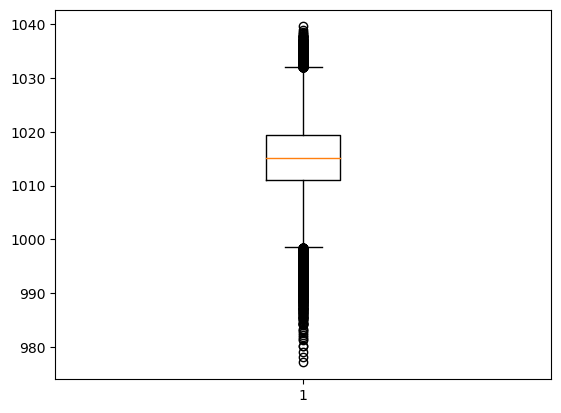

Cloud9am


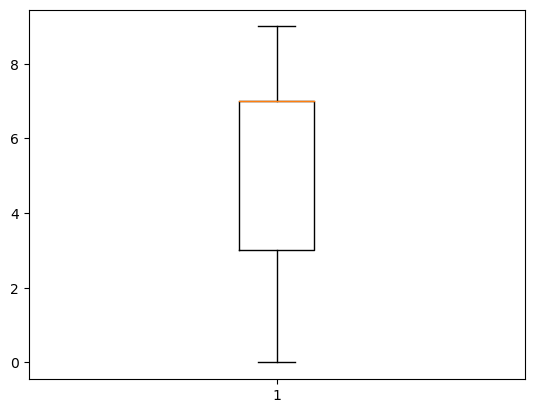

Cloud3pm


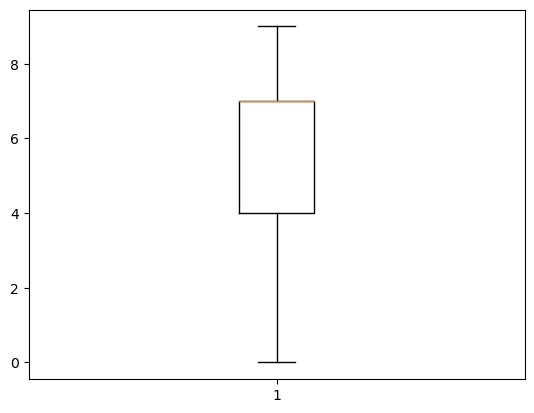

Temp9am


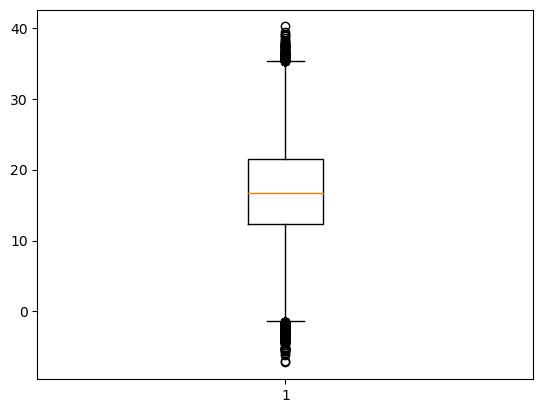

Temp3pm


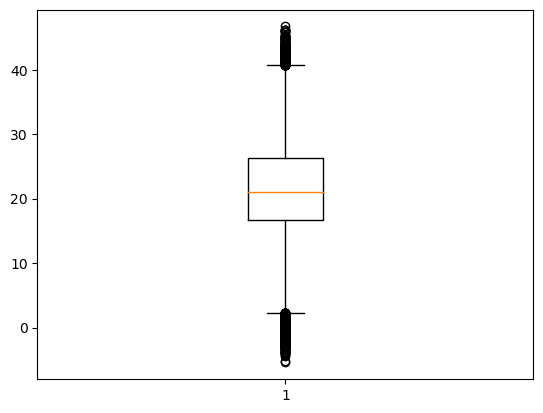

In [206]:
for col in numeric_columns:
    print(col)
    plt.boxplot(final_df[col])
    plt.show()

In [207]:
df_5per=final_df[numeric_columns].quantile(.5)
df_95per=final_df[numeric_columns].quantile(.95)

In [208]:
display(df_5per,df_95per)

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            7.0
Cloud3pm            7.0
Temp9am            16.7
Temp3pm            21.1
Name: 0.5, dtype: float64

MinTemp            23.0
MaxTemp            35.5
Rainfall           12.8
WindGustSpeed      65.0
WindSpeed9am       30.0
WindSpeed3pm       33.0
Humidity9am        98.0
Humidity3pm        87.0
Pressure9am      1029.1
Pressure3pm      1026.6
Cloud9am            8.0
Cloud3pm            8.0
Temp9am            28.2
Temp3pm            33.6
Name: 0.95, dtype: float64

In [209]:
final_df[numeric_columns]=final_df[numeric_columns].clip(df_5per,df_95per,axis=1)

MinTemp


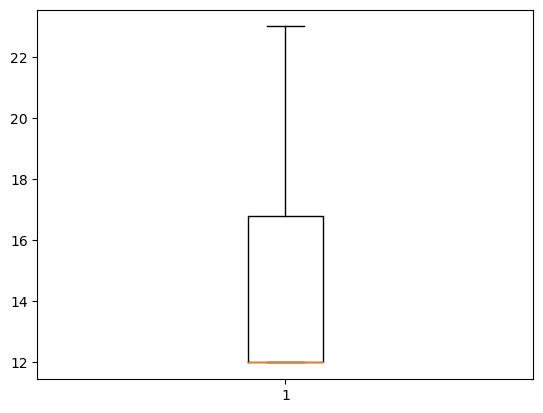

MaxTemp


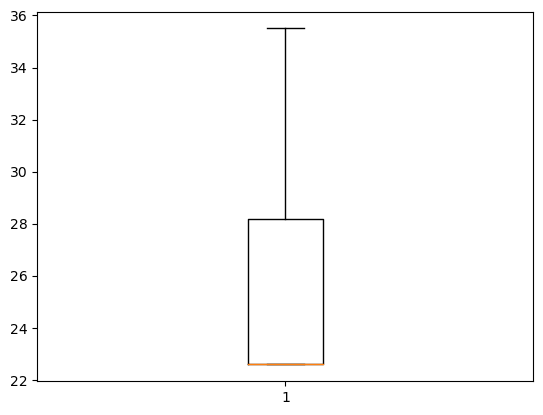

Rainfall


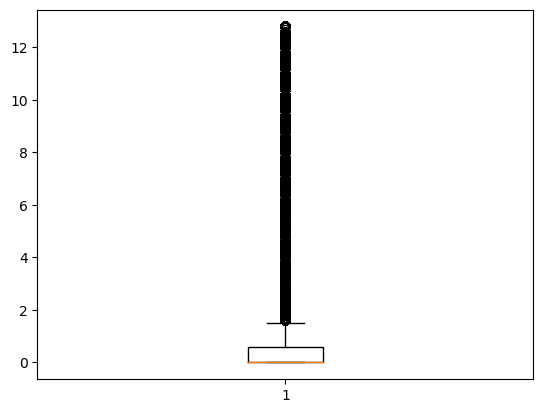

WindGustSpeed


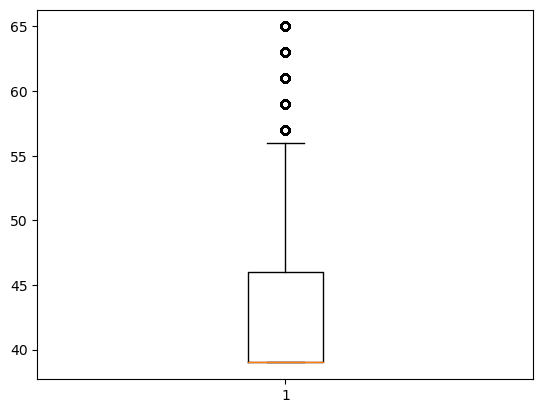

WindSpeed9am


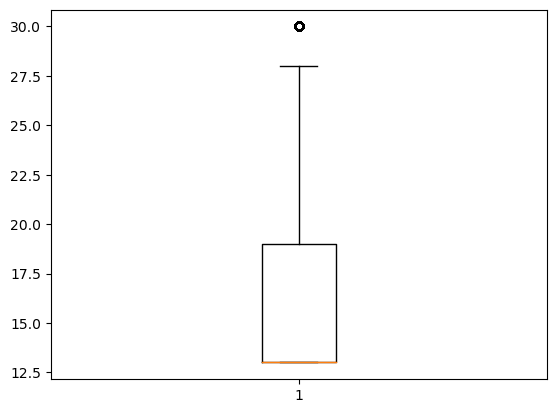

WindSpeed3pm


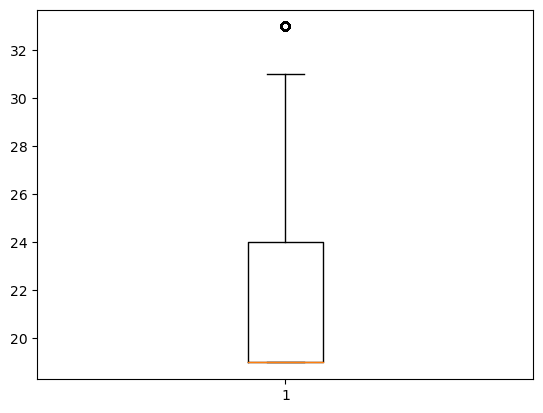

Humidity9am


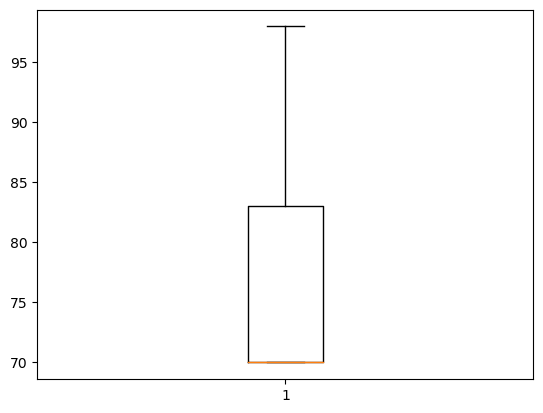

Humidity3pm


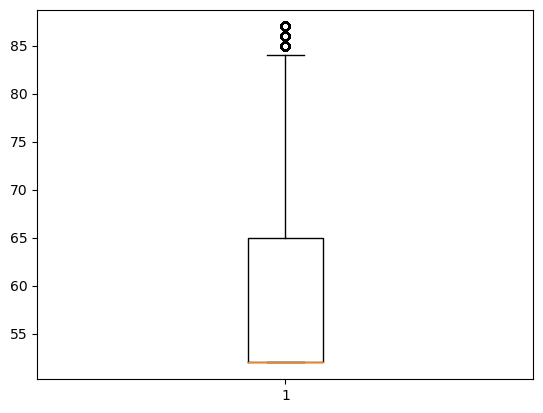

Pressure9am


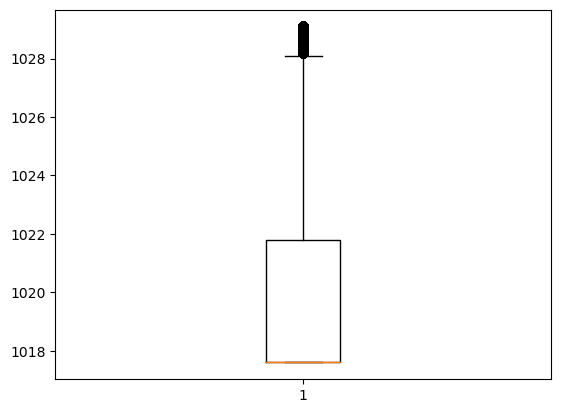

Pressure3pm


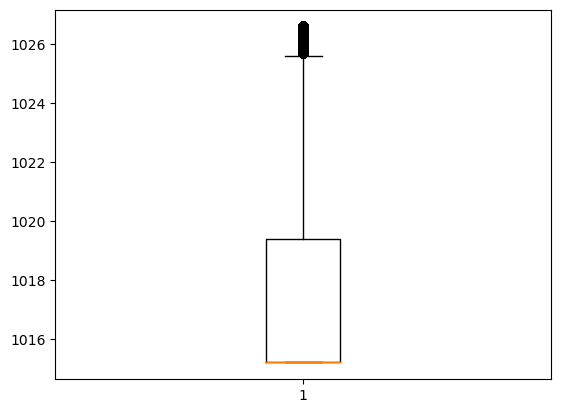

Cloud9am


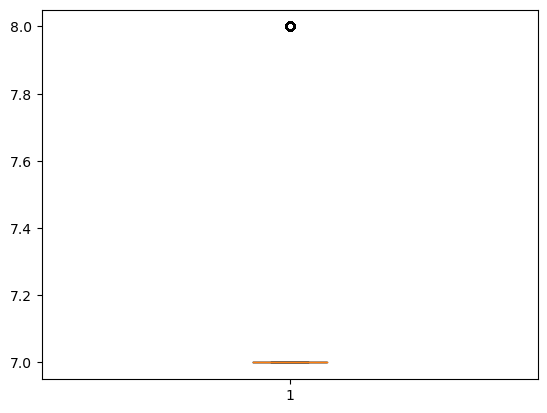

Cloud3pm


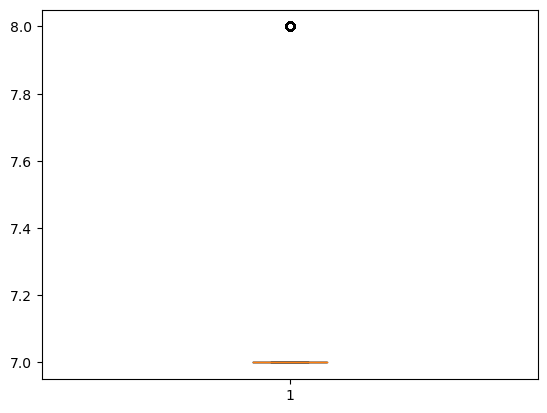

Temp9am


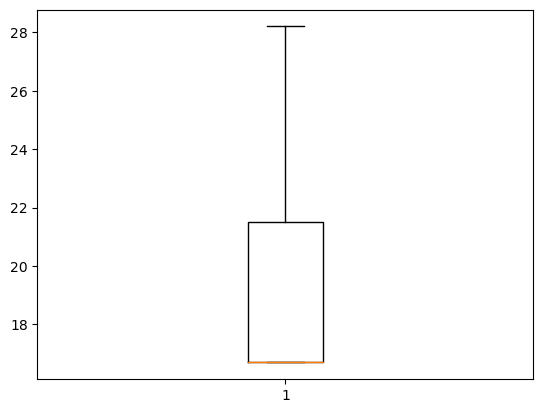

Temp3pm


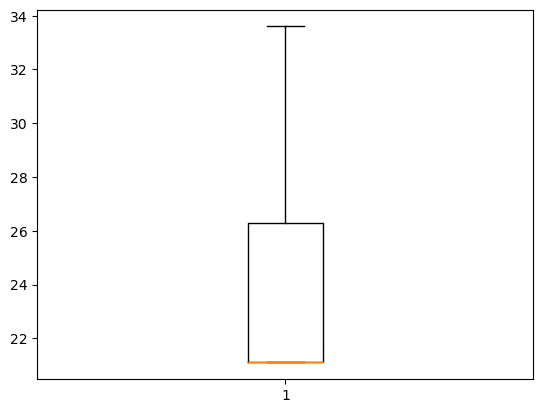

In [210]:
for col in numeric_columns:
    print(col)
    plt.boxplot(final_df[col])
    plt.show()

### Step-7:
Check the distribution of the target variable. Is it imbalanced data? If so, how are you going to proceed.

In [211]:
final_df['RainTomorrow_Yes'].value_counts()

0    110316
1     31877
Name: RainTomorrow_Yes, dtype: int64

#### The Target variable is not imbalanced and we can use it without creating synthetic data from minority class

In [212]:
final_df.head(2)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,RainToday_Yes,RainTomorrow_Yes,Month,Quarter,Week
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,52.0,1017.6,1015.2,8.0,7.0,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,4,49
1,12.0,25.1,0.0,44.0,13.0,22.0,70.0,52.0,1017.6,1015.2,7.0,7.0,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12,4,49


### Step-8:
Create a logistic regression model and prepare a classification report.

In [213]:
x=final_df.drop(columns=['RainTomorrow_Yes'])
y=final_df.RainTomorrow_Yes

In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

#### logistic regression Implementation

In [215]:
lr_model=LogisticRegression()

In [216]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [217]:
lr_model.score(x_train,y_train)

0.835655799467524

In [218]:
lr_model.score(x_test,y_test)

0.8343569787613109

In [219]:
y_pred=lr_model.predict(x_test)

In [220]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33133
           1       0.70      0.45      0.55      9525

    accuracy                           0.83     42658
   macro avg       0.78      0.70      0.72     42658
weighted avg       0.82      0.83      0.82     42658



In [221]:
print(confusion_matrix(y_test,y_pred))

[[31334  1799]
 [ 5267  4258]]


### Step-9:
Use XGBOOST classification and perform comparative analysis with the logistic regression model.

In [222]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [223]:
xgb_model=xgb.XGBClassifier()

In [224]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [225]:
xgb_model.score(x_train,y_train)

0.8746772492088211

In [226]:
xgb_model.score(x_test,y_test)

0.8454686108115711

In [227]:
y_pred=xgb_model.predict(x_test)

In [228]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     33133
           1       0.72      0.50      0.59      9525

    accuracy                           0.85     42658
   macro avg       0.79      0.72      0.75     42658
weighted avg       0.84      0.85      0.83     42658



In [229]:
print(confusion_matrix(y_test,y_pred))

[[31282  1851]
 [ 4741  4784]]
